# User groups

### 0. Import libraries

In [2]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

### 1. Settings

In [ ]:
URL = "tmrw.co" # User-entered website

In [20]:
# Time period 1st Jan - 30th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4

In [21]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-01-01
#end-date: 2017-04-30

#metrics
#ga:sessions
#ga:bounceRate
#ga:goal1ConversionRate
#ga:goal1Completions

#dimensions
#ga:city
#ga:userAgeBracket

#sort
#ga:goal1ConversionRate

Skipped step:
Check statistical validity 
Filter off spam traffic and own dev/marketing IPs




Algorithm of actions:



1. Determine buckets

### Are there lines that can be grouped by each metric:
Bounce Rate	
Avg. Session Duration	
Goal 1 Completions	
Goal 1 Conversion Rate	
Pages / Session



### Acceptable spread = 10%


Take Key_metrics and check volume of traffic and conversions. Which is the most extreme?
Conversion bucket = new array 
TMRW_users_city.max=TMRW_users_city.max()

2. Define key metrics
Key_metrics = location/age. Can be location/gender or age/gender also. For them other API call needs to be made.

3. Open file

4. Visualise

### 2. Data import & transformation

In [102]:
# Open file
input_users = pd.read_csv("files/TMRW_users.csv")

# rename columns
input_users.columns=['City','Age','Sessions','BR','Conversions','CR'] 
#input_users = input_users.sort_values('CR')

input_users_filter = input_users[input_users.Sessions > 80]
input_users_filter

,City,Age,Sessions,BR,Conversions,CR
2,London,45-54,165,53.939,2,1.212
3,Croydon,45-54,82,48.780,1,1.220
4,London,35-44,426,53.756,12,2.817
5,London,25-34,758,59.235,22,2.902
6,Croydon,35-44,204,43.137,6,2.941
8,Croydon,18-24,86,43.023,3,3.488
10,Croydon,25-34,299,47.157,15,5.017
11,London,18-24,155,51.613,8,5.161


### 3. Calculate

In [104]:
max_CR = max(input_users_filter.CR)
max_CR

max_CR_City = input_users_filter.set_index('CR').loc[max_CR,"City"]
max_CR_Age = input_users_filter.set_index('CR').loc[max_CR,"Age"]
max_CR_City_Age = max_CR_City + " " + max_CR_Age
max_CR_City_Age

'London 18-24'

In [116]:
#algo for bucketing into varios secsions: 

#buckets by CR

input_users_CR = input_users_filter.nlargest(5, 'CR')
input_users_CR_City = input_users_CR.groupby(['City','Age']).mean()
input_users_CR_Age = input_users_CR.groupby(['Age']).mean() 


### 4. Validate

### 5. Visualise

In [106]:
from bokeh.io import output_notebook
from bokeh.charts import Bar, Line, show
from bokeh.plotting import figure, output_file, show

output_notebook()
p = Bar(input_users_filter, label='City', values='CR', stack='Age', title="%s is most converting Demographic category" % max_CR_City_Age, agg="mean", legend="top_right")
show(p)
#print("Conversion rate for homepage is %s" % homepage_CR + "%")
#print("Put an additional button \"Contact Us\" on the main page. (or adding the contact form link to the menu bar at the top of the homepage")

Loading BokehJS ...

In [107]:
input_users_BR = input_users.nlargest(3, 'BR')
input_users_BR
#if the_largest traffic source = ('not_set') then output error ''

,City,Age,Sessions,BR,Conversions,CR
12,London,65+,14,71.429,1,7.143
0,(not set),35-44,16,62.500,0,0.000
9,(not set),25-34,24,62.500,1,4.167
0,(not set),35-44,16,62.500,0,0.000
9,(not set),25-34,24,62.500,1,4.167


In [113]:
input_users_city_sum = input_users.groupby(["City"]).sum()
input_users_city_sum

,Sessions,BR,Conversions,CR
City,,,,
(not set),40,125.000,1,4.167
Croydon,702,233.710,26,15.892
Hove,12,16.667,1,8.333
London,1554,337.194,45,19.235


In [114]:
output_chart_city=input_users_city_sum.loc[:,'Conversions']
output_chart_city

City
(not set)     1
Croydon      26
Hove          1
London       45
Name: Conversions, dtype: int64

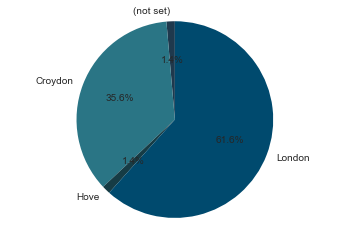

London segment converts best


In [118]:
labels = output_chart_city.index
sizes = output_chart_city
# colours are taken from http://tools.medialab.sciences-po.fr/iwanthue/
colors = ['#1f394d','#2a7585', '#163c45', '#004a6e']
explode = (0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

# Conversion traffic

# Generate text
print ("%s segment converts best" % max_CR_City )